In [403]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

In [404]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [405]:
df.count()

Unnamed: 0              2223
ID                      2223
Year_Birth              2223
Education               2223
Marital_Status          2223
Income                  2223
Kidhome                 2223
Teenhome                2223
Dt_Customer             2223
Recency                 2223
MntWines                2223
MntFruits               2223
MntMeatProducts         2223
MntFishProducts         2223
MntSweetProducts        2223
MntGoldProds            2223
NumDealsPurchases       2223
NumWebPurchases         2223
NumCatalogPurchases     2223
NumStorePurchases       2223
NumWebVisitsMonth       2223
Response                2223
Complain                2223
Age                     2223
Total_Spent             2223
BuyingPower             2202
HouseHoldMembers        2223
Total_Children          2223
TotalPurchases          2223
Dt_CustomerConverted    2223
SinceEnrolled           2223
CLV                     2223
AOV                     2223
dtype: int64

In [406]:
df.dropna(inplace=True)

In [407]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [408]:
data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'Recency', 'Complain','Age', 'Complain', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [409]:
data.count()

Income                 2202
Total_Children         2202
Marital_Status         2202
Education              2202
Response               2202
Recency                2202
Complain               2202
Age                    2202
Complain               2202
MntMeatProducts        2202
MntFishProducts        2202
MntSweetProducts       2202
MntGoldProds           2202
NumDealsPurchases      2202
NumWebPurchases        2202
NumCatalogPurchases    2202
NumStorePurchases      2202
dtype: int64

In [410]:
ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [411]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [412]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

oversampler = RandomOverSampler(random_state=0)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [413]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [414]:
classifier = SGDClassifier()
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))

In [415]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [416]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.6203
Precision: 0.2725
Recall: 0.9192
F1: 0.4203
AUC: 0.7434


In [417]:
print(len(preds))

661


# Figures

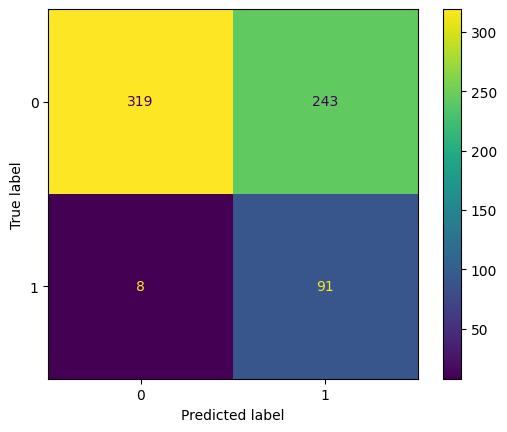

In [418]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)
# Normalize the confusion matrix to get probabilities
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)
cm_display.plot()
plt.show()

c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppDa

c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
c:\Users\nigel\AppDa

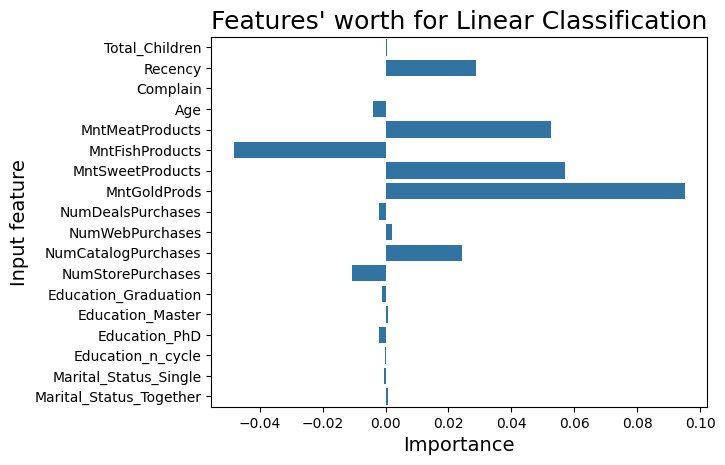

MntGoldProds: 0.09500756429652044
MntSweetProducts: 0.05713565305093294
MntMeatProducts: 0.05264750378214828
Recency: 0.02884518406454867
NumCatalogPurchases: 0.02435703479576401
NumWebPurchases: 0.0020171457387796335
Education_Master: 0.0008572869389813498
Marital_Status_Together: 0.000756429652042373
Total_Children: 0.0005042864346949172
Complain: 0.0001512859304084735
Complain: 0.0001512859304084735
Education_n_cycle: -0.00030257186081694514
Marital_Status_Single: -0.0006051437216338829
Education_Graduation: -0.0011094301563287908
NumDealsPurchases: -0.0019667170953101294
Education_PhD: -0.001966717095310135
Age: -0.0040847201210287365
NumStorePurchases: -0.010539586485123542
MntFishProducts: -0.0481593545133636


In [419]:
pipeline = Pipeline([
    ('classifier', classifier)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Now, use the pipeline for permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth for Linear Classification", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")